<a href="https://colab.research.google.com/github/somasundar0708/Pizza-insights-project/blob/main/Zomato_Bangalore_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Understanding Zomato's Business
sun = pd.read_csv("/content/zomato.csv",
                 engine ='python',  # The C parser throws errors when it encounters unexpected formatting
                 on_bad_lines='skip') # it skips that row instead of crashing


# 2) Total number of restaurants
Total_Restaurants = sun.shape[0] # Rows,,, [1] = Colums
print(Total_Restaurants)

# 3) Distribution by Delivery vs Dine-out
sun['listed_in(type)'].value_counts().head()
#print(distribution)




765


,count
listed_in(type),
Delivery,463
Dine-out,212
Desserts,59
Cafes,24
Buffet,7


In [2]:
# 2) Data Overview & Quality Check
# a) Shape of the dataset
hi = sun.shape
print(hi)

(765, 17)


In [3]:
# b) Data types of all colums.
hi = sun.dtypes.head() # head = top 5


In [4]:
sun

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,https://www.zomato.com/bangalore/matru-sagar-b...,"Shubashree Complex, 50 Feet Road, 1st Stage, H...",Matru Sagar,Yes,No,3.6/5,84,+91 9972368854,Banashankari,Quick Bites,"Coffee, Masala Dosa","South Indian, North Indian, Chinese",250,"[('Rated 3.0', 'RATED\n Good and reasonable f...","['Butter Naan', '2 Idli', 'Vada', 'Paper Masal...",Dine-out,Banashankari
761,https://www.zomato.com/bangalore/kavali-banash...,"Chennammana Kere, Kathreguppe, Banashankari, B...",Kavali,No,No,4.0/5,42,+91 9900998811,Banashankari,Quick Bites,"Cheese Dosa, Chocolate Dosa, Corn Dosa, Pesara...","South Indian, Street Food",300,"[('Rated 4.0', ""RATED\n Had heard about this ...",[],Dine-out,Banashankari
762,https://www.zomato.com/bangalore/bitez-banasha...,"12, Banashankari, Bangalore",Bitez,No,No,NEW,0,+91 9916781796,Banashankari,Quick Bites,NaN,Fast Food,100,"[('Rated 1.0', ""RATED\n Not a good place. Ove...",[],Dine-out,Banashankari
763,https://www.zomato.com/bangalore/bunts-biriyan...,"487, 80 Feet Road, Bank Colony, 1st Stage, Ban...",Bunt's Biriyani Palace,Yes,No,3.0/5,213,080 26697231\r\r\n+91 8711090256,Banashankari,Quick Bites,"Neer Dosa, Sea Food, Pepper Chicken","North Indian, South Indian, Chinese, Biryani, ...",400,"[('Rated 1.0', 'RATED\n Worst place to have s...","['Tandoori Chicken', 'Grill Chicken', 'Chicken...",Dine-out,Banashankari


In [5]:

cat_col = ["name","online_order","book_table","location","rest_type","dish_liked","cuisines","listed_in(type)","listed_in(city)"]
sun[cat_col] = sun[cat_col].astype("category")
print(sun[cat_col])
sun[cat_col].dtypes

                       name online_order book_table      location  \
0                     Jalsa          Yes        Yes  Banashankari   
1            Spice Elephant          Yes         No  Banashankari   
2           San Churro Cafe          Yes         No  Banashankari   
3     Addhuri Udupi Bhojana           No         No  Banashankari   
4             Grand Village           No         No  Basavanagudi   
..                      ...          ...        ...           ...   
760             Matru Sagar          Yes         No  Banashankari   
761                  Kavali           No         No  Banashankari   
762                   Bitez           No         No  Banashankari   
763  Bunt's Biriyani Palace          Yes         No  Banashankari   
764         Funjabi Curries          Yes         No  Banashankari   

               rest_type                                         dish_liked  \
0          Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1          Ca

,0
name,category
online_order,category
book_table,category
location,category
rest_type,category
dish_liked,category
cuisines,category
listed_in(type),category
listed_in(city),category


In [6]:
# •	Missing value detection
sun.dropna
sun.isnull().sum()  # head =  first values,,,# Tail = last values

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,84
votes,0
phone,10
location,0
rest_type,0


In [7]:
# •	Statistical summary of numerical columns
sun.describe()

,votes
count,765.000000
mean,174.831373
std,394.013566
min,0.000000
25%,10.000000
50%,46.000000
75%,160.000000
max,4884.000000


In [8]:
sun['online_order'].value_counts()

,count
online_order,
Yes,506
No,259


In [9]:
sun['online_order'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [10]:
sun['book_table'].value_counts()

,count
book_table,
No,723
Yes,42


In [11]:
sun['rest_type'].value_counts()

,count
rest_type,
Quick Bites,367
Casual Dining,137
Cafe,65
Dessert Parlor,42
Bakery,21
"Takeaway, Delivery",18
Delivery,15
Sweet Shop,14
Beverage Shop,11


In [12]:
sun['location'].value_counts()

,count
location,
Banashankari,479
Basavanagudi,112
Jayanagar,88
Kumaraswamy Layout,54
Uttarahalli,10
Mysore Road,8
Vijay Nagar,5
JP Nagar,4
South Bangalore,2


In [13]:
sun[['cuisines','location']].value_counts() # in squre brakets we can different coloum names but we must keep 2 sqaure brackets

,,count
cuisines,location,
South Indian,Banashankari,47
"North Indian, Chinese",Banashankari,25
North Indian,Banashankari,22
"Bakery, Desserts",Banashankari,14
Biryani,Banashankari,13
...,...,...
Arabian,Banashankari,1
"South Indian, North Indian, Continental",Banashankari,1
"South Indian, North Indian, Seafood, Mangalorean",Banashankari,1


In [14]:
sun["rate"]=sun["rate"].str.replace('/5','')
sun["rate"]=sun["rate"].str.replace('NaN','0')
sun


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,https://www.zomato.com/bangalore/matru-sagar-b...,"Shubashree Complex, 50 Feet Road, 1st Stage, H...",Matru Sagar,Yes,No,3.6,84,+91 9972368854,Banashankari,Quick Bites,"Coffee, Masala Dosa","South Indian, North Indian, Chinese",250,"[('Rated 3.0', 'RATED\n Good and reasonable f...","['Butter Naan', '2 Idli', 'Vada', 'Paper Masal...",Dine-out,Banashankari
761,https://www.zomato.com/bangalore/kavali-banash...,"Chennammana Kere, Kathreguppe, Banashankari, B...",Kavali,No,No,4.0,42,+91 9900998811,Banashankari,Quick Bites,"Cheese Dosa, Chocolate Dosa, Corn Dosa, Pesara...","South Indian, Street Food",300,"[('Rated 4.0', ""RATED\n Had heard about this ...",[],Dine-out,Banashankari
762,https://www.zomato.com/bangalore/bitez-banasha...,"12, Banashankari, Bangalore",Bitez,No,No,NEW,0,+91 9916781796,Banashankari,Quick Bites,NaN,Fast Food,100,"[('Rated 1.0', ""RATED\n Not a good place. Ove...",[],Dine-out,Banashankari
763,https://www.zomato.com/bangalore/bunts-biriyan...,"487, 80 Feet Road, Bank Colony, 1st Stage, Ban...",Bunt's Biriyani Palace,Yes,No,3.0,213,080 26697231\r\r\n+91 8711090256,Banashankari,Quick Bites,"Neer Dosa, Sea Food, Pepper Chicken","North Indian, South Indian, Chinese, Biryani, ...",400,"[('Rated 1.0', 'RATED\n Worst place to have s...","['Tandoori Chicken', 'Grill Chicken', 'Chicken...",Dine-out,Banashankari


In [15]:
sun.dropna(subset=['rate']) # dropna = Removing null values
#subset  = targeted data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,https://www.zomato.com/bangalore/matru-sagar-b...,"Shubashree Complex, 50 Feet Road, 1st Stage, H...",Matru Sagar,Yes,No,3.6,84,+91 9972368854,Banashankari,Quick Bites,"Coffee, Masala Dosa","South Indian, North Indian, Chinese",250,"[('Rated 3.0', 'RATED\n Good and reasonable f...","['Butter Naan', '2 Idli', 'Vada', 'Paper Masal...",Dine-out,Banashankari
761,https://www.zomato.com/bangalore/kavali-banash...,"Chennammana Kere, Kathreguppe, Banashankari, B...",Kavali,No,No,4.0,42,+91 9900998811,Banashankari,Quick Bites,"Cheese Dosa, Chocolate Dosa, Corn Dosa, Pesara...","South Indian, Street Food",300,"[('Rated 4.0', ""RATED\n Had heard about this ...",[],Dine-out,Banashankari
762,https://www.zomato.com/bangalore/bitez-banasha...,"12, Banashankari, Bangalore",Bitez,No,No,NEW,0,+91 9916781796,Banashankari,Quick Bites,NaN,Fast Food,100,"[('Rated 1.0', ""RATED\n Not a good place. Ove...",[],Dine-out,Banashankari
763,https://www.zomato.com/bangalore/bunts-biriyan...,"487, 80 Feet Road, Bank Colony, 1st Stage, Ban...",Bunt's Biriyani Palace,Yes,No,3.0,213,080 26697231\r\r\n+91 8711090256,Banashankari,Quick Bites,"Neer Dosa, Sea Food, Pepper Chicken","North Indian, South Indian, Chinese, Biryani, ...",400,"[('Rated 1.0', 'RATED\n Worst place to have s...","['Tandoori Chicken', 'Grill Chicken', 'Chicken...",Dine-out,Banashankari


In [16]:
# •	Converting cost column to numeric
sun['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)


,approx_cost(for two people)
0,800.0
1,800.0
2,800.0
3,300.0
4,600.0
...,...
760,250.0
761,300.0
762,100.0
763,400.0


In [17]:
sun.dtypes

,0
url,object
address,object
name,category
online_order,category
book_table,category
rate,object
votes,int64
phone,object
location,category
rest_type,category


In [18]:
sun.drop_duplicates()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,https://www.zomato.com/bangalore/matru-sagar-b...,"Shubashree Complex, 50 Feet Road, 1st Stage, H...",Matru Sagar,Yes,No,3.6,84,+91 9972368854,Banashankari,Quick Bites,"Coffee, Masala Dosa","South Indian, North Indian, Chinese",250,"[('Rated 3.0', 'RATED\n Good and reasonable f...","['Butter Naan', '2 Idli', 'Vada', 'Paper Masal...",Dine-out,Banashankari
761,https://www.zomato.com/bangalore/kavali-banash...,"Chennammana Kere, Kathreguppe, Banashankari, B...",Kavali,No,No,4.0,42,+91 9900998811,Banashankari,Quick Bites,"Cheese Dosa, Chocolate Dosa, Corn Dosa, Pesara...","South Indian, Street Food",300,"[('Rated 4.0', ""RATED\n Had heard about this ...",[],Dine-out,Banashankari
762,https://www.zomato.com/bangalore/bitez-banasha...,"12, Banashankari, Bangalore",Bitez,No,No,NEW,0,+91 9916781796,Banashankari,Quick Bites,NaN,Fast Food,100,"[('Rated 1.0', ""RATED\n Not a good place. Ove...",[],Dine-out,Banashankari
763,https://www.zomato.com/bangalore/bunts-biriyan...,"487, 80 Feet Road, Bank Colony, 1st Stage, Ban...",Bunt's Biriyani Palace,Yes,No,3.0,213,080 26697231\r\r\n+91 8711090256,Banashankari,Quick Bites,"Neer Dosa, Sea Food, Pepper Chicken","North Indian, South Indian, Chinese, Biryani, ...",400,"[('Rated 1.0', 'RATED\n Worst place to have s...","['Tandoori Chicken', 'Grill Chicken', 'Chicken...",Dine-out,Banashankari


In [19]:
sun.drop_duplicates().count()


,0
url,765
address,765
name,765
online_order,765
book_table,765
rate,681
votes,765
phone,755
location,765
rest_type,765


In [20]:
sun['cuisines'] = sun['cuisines'].astype(str)
sun['cuisines'] = sun['cuisines'].str.split(',')
sun_exploded = sun.explode('cuisines')
sun_exploded['cuisines'] = sun_exploded['cuisines'].str.strip()


In [21]:
sun['location'] = sun['location'].astype(str)
sun['location'] = sun['location'].str.split(',')
sun_exploded = sun.explode('location')
sun_exploded['location'] = sun_exploded['location'].str.strip()


In [22]:
sun

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,[Banashankari],Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,[Banashankari],Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,[Banashankari],"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,[Banashankari],Quick Bites,Masala Dosa,"[South Indian, North Indian]",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,[Basavanagudi],Casual Dining,"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,https://www.zomato.com/bangalore/matru-sagar-b...,"Shubashree Complex, 50 Feet Road, 1st Stage, H...",Matru Sagar,Yes,No,3.6,84,+91 9972368854,[Banashankari],Quick Bites,"Coffee, Masala Dosa","[South Indian, North Indian, Chinese]",250,"[('Rated 3.0', 'RATED\n Good and reasonable f...","['Butter Naan', '2 Idli', 'Vada', 'Paper Masal...",Dine-out,Banashankari
761,https://www.zomato.com/bangalore/kavali-banash...,"Chennammana Kere, Kathreguppe, Banashankari, B...",Kavali,No,No,4.0,42,+91 9900998811,[Banashankari],Quick Bites,"Cheese Dosa, Chocolate Dosa, Corn Dosa, Pesara...","[South Indian, Street Food]",300,"[('Rated 4.0', ""RATED\n Had heard about this ...",[],Dine-out,Banashankari
762,https://www.zomato.com/bangalore/bitez-banasha...,"12, Banashankari, Bangalore",Bitez,No,No,NEW,0,+91 9916781796,[Banashankari],Quick Bites,NaN,[Fast Food],100,"[('Rated 1.0', ""RATED\n Not a good place. Ove...",[],Dine-out,Banashankari
763,https://www.zomato.com/bangalore/bunts-biriyan...,"487, 80 Feet Road, Bank Colony, 1st Stage, Ban...",Bunt's Biriyani Palace,Yes,No,3.0,213,080 26697231\r\r\n+91 8711090256,[Banashankari],Quick Bites,"Neer Dosa, Sea Food, Pepper Chicken","[North Indian, South Indian, Chinese, Birya...",400,"[('Rated 1.0', 'RATED\n Worst place to have s...","['Tandoori Chicken', 'Grill Chicken', 'Chicken...",Dine-out,Banashankari


In [23]:
sun['rest_type'] = sun['rest_type'].astype(str)
sun['rest_type'] = sun['rest_type'].str.split(',')
sun_exploded = sun.explode('rest_type')
sun_exploded['rest_type'] = sun_exploded['rest_type'].str.strip()


In [24]:
sun

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,[Banashankari],[Casual Dining],"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,[Banashankari],[Casual Dining],"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,[Banashankari],"[Cafe, Casual Dining]","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,[Banashankari],[Quick Bites],Masala Dosa,"[South Indian, North Indian]",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,[Basavanagudi],[Casual Dining],"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,https://www.zomato.com/bangalore/matru-sagar-b...,"Shubashree Complex, 50 Feet Road, 1st Stage, H...",Matru Sagar,Yes,No,3.6,84,+91 9972368854,[Banashankari],[Quick Bites],"Coffee, Masala Dosa","[South Indian, North Indian, Chinese]",250,"[('Rated 3.0', 'RATED\n Good and reasonable f...","['Butter Naan', '2 Idli', 'Vada', 'Paper Masal...",Dine-out,Banashankari
761,https://www.zomato.com/bangalore/kavali-banash...,"Chennammana Kere, Kathreguppe, Banashankari, B...",Kavali,No,No,4.0,42,+91 9900998811,[Banashankari],[Quick Bites],"Cheese Dosa, Chocolate Dosa, Corn Dosa, Pesara...","[South Indian, Street Food]",300,"[('Rated 4.0', ""RATED\n Had heard about this ...",[],Dine-out,Banashankari
762,https://www.zomato.com/bangalore/bitez-banasha...,"12, Banashankari, Bangalore",Bitez,No,No,NEW,0,+91 9916781796,[Banashankari],[Quick Bites],NaN,[Fast Food],100,"[('Rated 1.0', ""RATED\n Not a good place. Ove...",[],Dine-out,Banashankari
763,https://www.zomato.com/bangalore/bunts-biriyan...,"487, 80 Feet Road, Bank Colony, 1st Stage, Ban...",Bunt's Biriyani Palace,Yes,No,3.0,213,080 26697231\r\r\n+91 8711090256,[Banashankari],[Quick Bites],"Neer Dosa, Sea Food, Pepper Chicken","[North Indian, South Indian, Chinese, Birya...",400,"[('Rated 1.0', 'RATED\n Worst place to have s...","['Tandoori Chicken', 'Grill Chicken', 'Chicken...",Dine-out,Banashankari


In [25]:
sun['rate'] = sun['rate'].astype(str)
sun['rate'] = sun['rate'].str.replace('/5', '')
sun['rate'] = pd.to_numeric(sun['rate'], errors='coerce')


In [26]:
sun = sun.dropna(subset=['rate'])


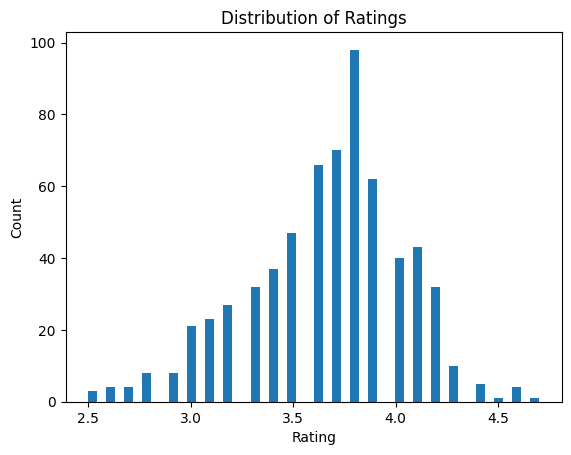

In [33]:
plt.hist(sun['rate'], bins=50)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


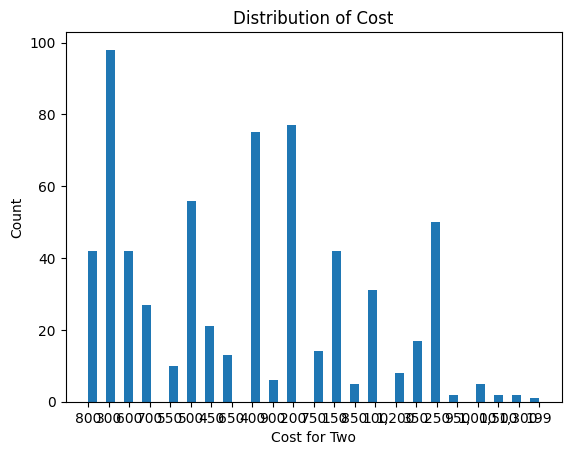

In [37]:
plt.hist(sun['approx_cost(for two people)'], bins=50)
plt.xlabel('Cost for Two')
plt.ylabel('Count')
plt.title('Distribution of Cost')
plt.show()


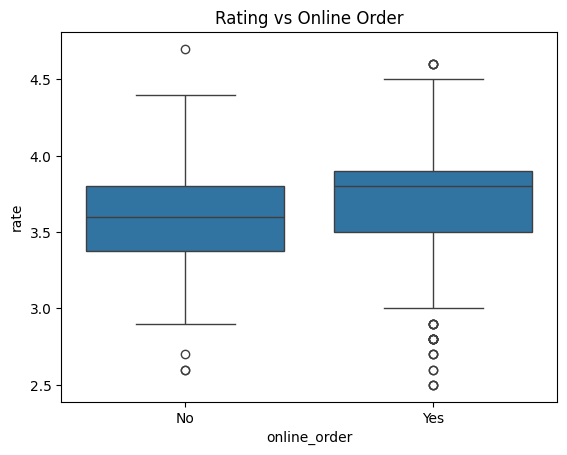

In [38]:
sns.boxplot(x='online_order', y='rate', data=sun)
plt.title('Rating vs Online Order')
plt.show()


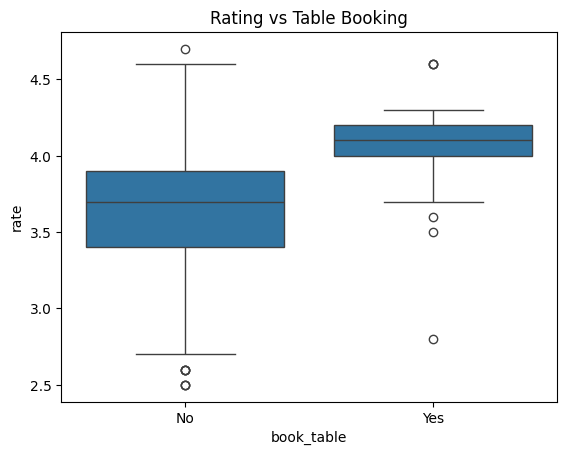

In [39]:
sns.boxplot(x='book_table', y='rate', data=sun)
plt.title('Rating vs Table Booking')
plt.show()


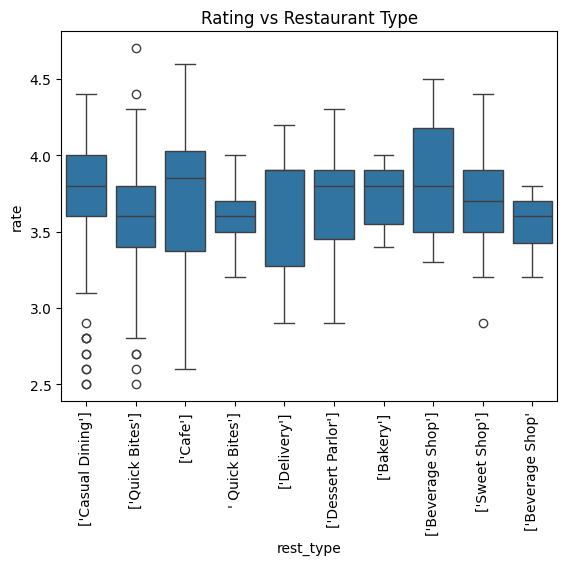

In [42]:
sun_rt = sun.copy()

sun_rt['rest_type'] = sun_rt['rest_type'].astype(str).str.split(', ')
sun_rt = sun_rt.explode('rest_type')

top_rest_types = sun_rt['rest_type'].value_counts().head(10).index

sns.boxplot(
    x='rest_type',
    y='rate',
    data=sun_rt[sun_rt['rest_type'].isin(top_rest_types)]
)
plt.xticks(rotation=90)
plt.title('Rating vs Restaurant Type')
plt.show()


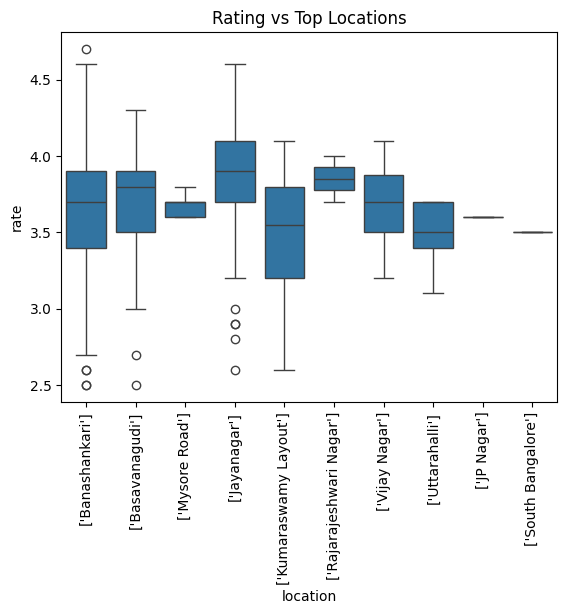

In [43]:
sun_loc = sun.copy()

sun_loc['location'] = sun_loc['location'].astype(str).str.split(', ')
sun_loc = sun_loc.explode('location')

top_locations = sun_loc['location'].value_counts().head(10).index

sns.boxplot(
    x='location',
    y='rate',
    data=sun_loc[sun_loc['location'].isin(top_locations)]
)
plt.xticks(rotation=90)
plt.title('Rating vs Top Locations')
plt.show()


In [44]:
sun['rate'].isnull().sum()


np.int64(0)

In [45]:
sun['cuisines'].isnull().sum()


np.int64(0)

In [46]:
sun['rest_type'].isnull().sum()


np.int64(0)

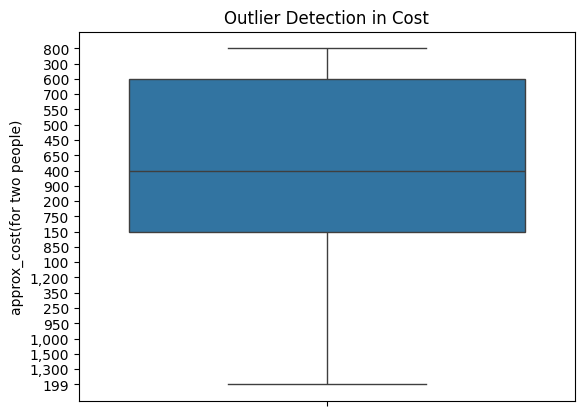

In [47]:
sns.boxplot(y=sun['approx_cost(for two people)'])
plt.title('Outlier Detection in Cost')
plt.show()


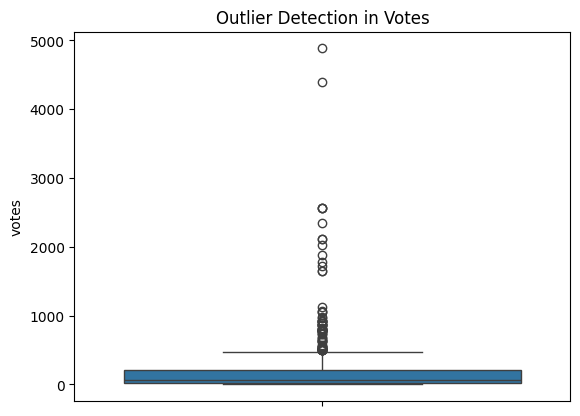

In [48]:
sns.boxplot(y=sun['votes'])
plt.title('Outlier Detection in Votes')
plt.show()
